<a href="https://colab.research.google.com/github/AtishaySG25/Project_AIML/blob/Colab-Notebooks/Peak_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('seaborn-whitegrid')
%matplotlib inline

C:\Users\ATISHAY SG\AppData\Local\Temp\ipykernel_5512\2221108346.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [13]:
# from google.colab import drive
# # drive.mount('/content/drive')

In [14]:
# Setup working directory and load data
# DIR = '/content/drive/MyDrive/Colab Notebooks/Project'
# FILENAME = 'Data/Sudarsan Sir-Acceleration data with g.csv'
# os.chdir(DIR)
# Load gait data
df = pd.read_csv('D:\Projects_AIML\Sudarsan Sir-Acceleration data with g\Raw Data.csv')
df.head(15)

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.261751,-1.517924,9.684845,-0.026336,9.803112
1,0.263751,-1.520318,9.658509,-0.031125,9.777481
2,0.265751,-1.525106,9.660903,-0.021548,9.780565
3,0.267751,-1.529895,9.658509,-0.026336,9.778961
4,0.269751,-1.520318,9.658509,-0.035913,9.777498
5,0.271750,-1.510741,9.648932,-0.031125,9.766535
6,0.273750,-1.527501,9.639356,-0.033519,9.759691
7,0.275750,-1.513135,9.632173,-0.026336,9.750334
8,0.277750,-1.503559,9.615414,-0.014365,9.732270
9,0.279750,-1.491588,9.610625,-0.019154,9.725704


In [15]:
#from scipy .constants import g

In [16]:
#df['Acceleration y (m/s^2)'] = df['Acceleration y (m/s^2)'] - g
df

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.261751,-1.517924,9.684845,-0.026336,9.803112
1,0.263751,-1.520318,9.658509,-0.031125,9.777481
2,0.265751,-1.525106,9.660903,-0.021548,9.780565
3,0.267751,-1.529895,9.658509,-0.026336,9.778961
4,0.269751,-1.520318,9.658509,-0.035913,9.777498
...,...,...,...,...,...
33231,66.724536,-2.353500,7.079954,6.249166,9.732255
33232,66.726536,-2.308010,7.197269,6.215647,9.785799
33233,66.728536,-2.274492,7.302615,6.179734,9.833138
33234,66.730536,-2.257732,7.391200,6.146215,9.874368


In [17]:
start_index = 90
end_index = 100

df_subset = df.loc[start_index:end_index]

In [18]:
start_index = 33135
end_index = 33235

df_subset = df.loc[start_index:end_index]

In [19]:
start_index = 11035
end_index = 11285 #250

df_subset = df.loc[start_index:end_index]

In [20]:
start_index = 5000
end_index = 30000

df_subset = df.loc[start_index:end_index]

In [21]:
df_subset


,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
5000,10.264250,-2.628834,2.650381,-0.385466,3.752848
5001,10.266250,-0.995988,5.267543,2.121263,5.765306
5002,10.268250,-0.337582,6.241983,3.043030,6.952435
5003,10.270250,0.275333,7.501333,3.550601,8.303769
5004,10.272250,0.500388,8.327332,2.906561,8.834192
...,...,...,...,...,...
29996,60.254816,-6.912360,23.959375,-4.596867,25.356726
29997,60.256815,-6.115090,25.125650,-4.869806,26.313640
29998,60.258814,-5.478233,26.059389,-5.087978,27.110705
29999,60.260814,-4.876989,26.878206,-5.303456,27.827138


In [22]:
print(df['Acceleration x (m/s^2)'])

0       -1.517924
1       -1.520318
2       -1.525106
3       -1.529895
4       -1.520318
           ...   
33231   -2.353500
33232   -2.308010
33233   -2.274492
33234   -2.257732
33235   -2.257732
Name: Acceleration x (m/s^2), Length: 33236, dtype: float64


In [23]:
from matplotlib.legend import Shadow
# User-defined function for producing a component plot of a vector
def plotveccomp(x, name = ' ', axis = None, linewidth = 1, color = 'black', marker = ''):
  ax = axis
  component_index = range(0, len(x))
  ax.plot(component_index, x, linewidth = linewidth, color = color, marker = marker)
  ax.plot(component_index, [np.mean(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='blue',label='Mean')
  ax.plot(component_index, [np.mean(x) - np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red',label='Z-Score')
  ax.plot(component_index, [np.mean(x) + np.std(x)]*len(x), linewidth = 1, linestyle = 'dashed', color ='red')
  plt.legend(framealpha=1, frameon=True,bbox_to_anchor=(1.0, 1.0))
  ax.set_xlabel('Time (s)')
  ax.set_ylabel('Acceleration (m/s^2)')
  ax1.set_title('Acceleration data(X-axis)')
  ax2.set_title('Acceleration data(Y-axis)')
  ax3.set_title('Acceleration data(Z-axis)')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


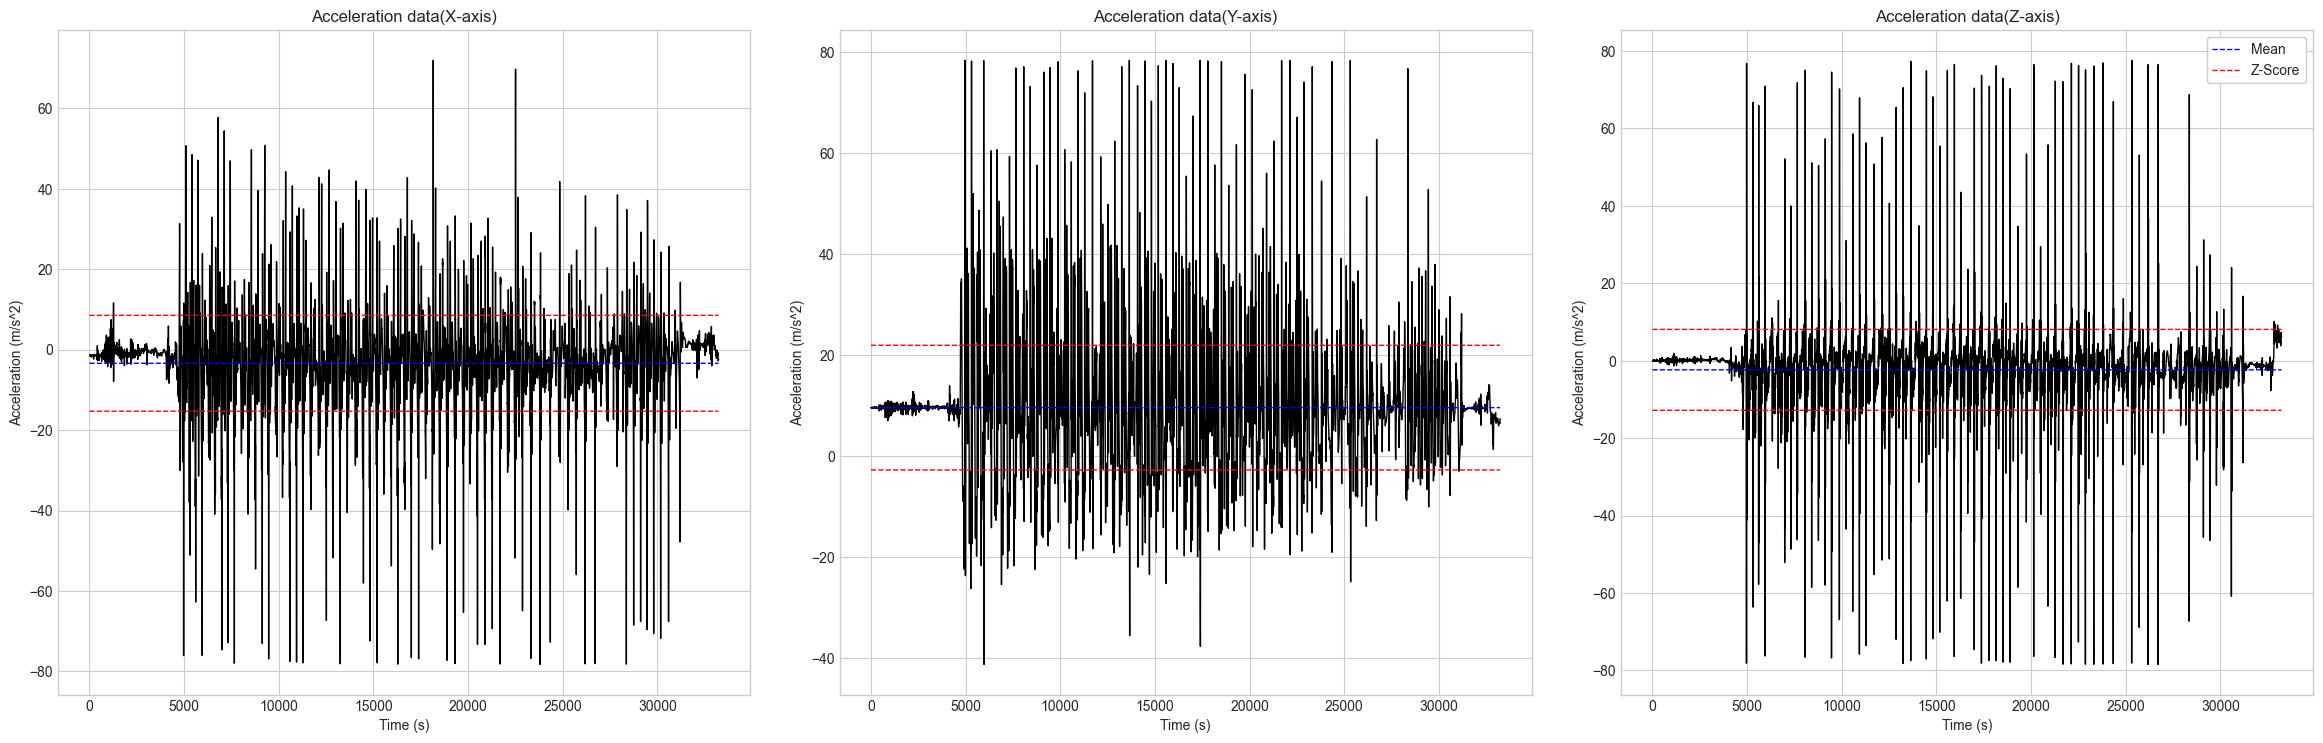

In [24]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (24,8))#24,5
fig.tight_layout(pad = 4.0)
plotveccomp(df['Acceleration x (m/s^2)'], 'Acceleration X-axis', ax1)
plotveccomp(df['Acceleration y (m/s^2)'], 'Acceleration Y-axis', ax2)
plotveccomp(df['Acceleration z (m/s^2)'], 'Acceleration Z-axis', ax3)
plt.savefig('stdofvec.png')

In [25]:
from sklearn.preprocessing import StandardScaler


In [26]:
from numpy.lib.stride_tricks import sliding_window_view

In [27]:
data = np.array(df['Acceleration y (m/s^2)'])
window_size = 10
scaler = StandardScaler()
y_std = scaler.fit_transform(data.reshape(-1, 1))
std_dev_windows = sliding_window_view(y_std, window_shape=(window_size,), axis=0).std(axis=-1)
print("Standard Deviation for Sliding Windows:")
print(std_dev_windows[4900:5050])
moving_average_windows = sliding_window_view(y_std, window_shape=(window_size,), axis=0).mean(axis=-1)
print("Moving Average for Sliding Windows:")
print(moving_average_windows[:5])


Standard Deviation for Sliding Windows:
[[0.02384267]
 [0.02663227]
 [0.03971044]
 [0.06177125]
 [0.08085943]
 [0.11166306]
 [0.15403615]
 [0.25699969]
 [0.30566426]
 [0.32687192]
 [0.328886  ]
 [0.3193324 ]
 [0.29409406]
 [0.25500216]
 [0.19324933]
 [0.14069826]
 [0.15331665]
 [0.20527571]
 [0.26272035]
 [0.31464152]
 [0.34708017]
 [0.35539488]
 [0.33771999]
 [0.29284425]
 [0.23216604]
 [0.1700527 ]
 [0.12356271]
 [0.09773996]
 [0.10515366]
 [0.11982762]
 [0.13113442]
 [0.13258938]
 [0.12252714]
 [0.10258575]
 [0.07733475]
 [0.05787609]
 [0.04285749]
 [0.05338372]
 [0.05904639]
 [0.06124047]
 [0.0570787 ]
 [0.04725639]
 [0.03833147]
 [0.03650252]
 [0.04777566]
 [0.05947955]
 [0.07296713]
 [0.12804481]
 [0.15316257]
 [0.16307453]
 [0.16380147]
 [0.16257124]
 [0.15152503]
 [0.13068981]
 [0.16017308]
 [0.27255312]
 [0.72001431]
 [1.65468453]
 [2.32698022]
 [2.84719208]
 [3.14418965]
 [3.23688478]
 [3.14386842]
 [2.86538863]
 [2.40451721]
 [1.65170388]
 [0.82097611]
 [1.60776989]
 [2.1069

In [28]:
threshold = 1.5
start = np.where(std_dev_windows >= threshold)[0][0]
start

4957

In [29]:
data = np.array(df['Acceleration y (m/s^2)'])
window_size = 10
scaler = StandardScaler()
y_std = scaler.fit_transform(data.reshape(-1, 1))
std_dev_windows = sliding_window_view(y_std[-1+window_size:], window_shape=(window_size,), axis=0).std(axis=-1)

In [30]:
end = len(y_std)-np.where(std_dev_windows >= threshold)[0][0]
end

28288

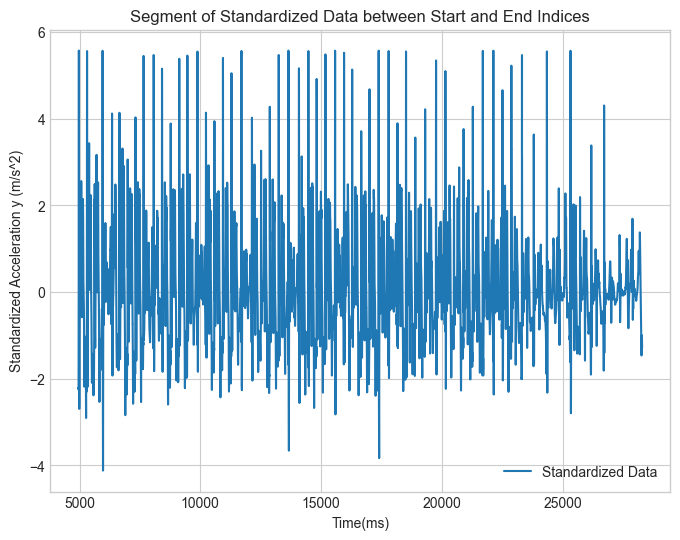

In [31]:
# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot the segment of 'Acceleration y (m/s^2)' data between start and end indices
ax.plot(np.arange(start, end), y_std[start:end], label='Standardized Data')
ax.set_xlabel('Time(ms)')
ax.set_ylabel('Standardized Acceleration y (m/s^2)')
ax.legend()
ax.set_title('Segment of Standardized Data between Start and End Indices')

# Show the plot
plt.show()

In [32]:
# Slice the entire DataFrame between start_index and end_index
sliced_df = df.iloc[start:end]

# Print the sliced DataFrame
print("Sliced DataFrame:")
print(sliced_df)


Sliced DataFrame:
        Time (s)  Acceleration x (m/s^2)  Acceleration y (m/s^2)  \
4957   10.178251              -16.202162              -17.545309   
4958   10.180250              -16.202162              -17.545309   
4959   10.182250              -15.859791              -17.619530   
4960   10.184250              -13.704710              -18.088793   
4961   10.186249              -12.648867              -17.973871   
...          ...                     ...                     ...   
28283  56.828814               -0.407014               -4.517859   
28284  56.830814               -0.883460               -5.004181   
28285  56.832814               -1.072602               -5.262754   
28286  56.834814               -1.589750               -5.981015   
28287  56.836816               -1.630451               -6.206070   

       Acceleration z (m/s^2)  Absolute acceleration (m/s^2)  
4957                 7.901165                      25.155046  
4958                 7.901165          

In [33]:
# Assuming 'sliced_df' is your DataFrame
sliced_df.reset_index(drop=True, inplace=True)

# Reset the "Time (s)" column to start from 0 seconds
sliced_df["Time (s)"] = sliced_df["Time (s)"] - sliced_df["Time (s)"].iloc[0]

# Print the DataFrame with the updated index and "Time (s)" column
print("DataFrame with Updated Index and Time:")
print(sliced_df)


DataFrame with Updated Index and Time:
        Time (s)  Acceleration x (m/s^2)  Acceleration y (m/s^2)  \
0       0.000000              -16.202162              -17.545309   
1       0.001999              -16.202162              -17.545309   
2       0.003999              -15.859791              -17.619530   
3       0.005999              -13.704710              -18.088793   
4       0.007998              -12.648867              -17.973871   
...          ...                     ...                     ...   
23326  46.650563               -0.407014               -4.517859   
23327  46.652563               -0.883460               -5.004181   
23328  46.654563               -1.072602               -5.262754   
23329  46.656563               -1.589750               -5.981015   
23330  46.658565               -1.630451               -6.206070   

       Acceleration z (m/s^2)  Absolute acceleration (m/s^2)  
0                    7.901165                      25.155046  
1                 

C:\Users\ATISHAY SG\AppData\Local\Temp\ipykernel_5512\3183841277.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sliced_df["Time (s)"] = sliced_df["Time (s)"] - sliced_df["Time (s)"].iloc[0]


In [34]:
start_index = 0
end_index = 5000

df_subset = sliced_df.loc[start_index:end_index]
df_subset

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.000000,-16.202162,-17.545309,7.901165,25.155046
1,0.001999,-16.202162,-17.545309,7.901165,25.155046
2,0.003999,-15.859791,-17.619530,-0.023942,23.706146
3,0.005999,-13.704710,-18.088793,-21.143793,31.017471
4,0.007998,-12.648867,-17.973871,-31.958702,38.786757
...,...,...,...,...,...
4996,9.991691,-4.656722,10.513239,-11.813291,16.485360
4997,9.993691,-4.764462,11.006445,-12.284948,17.168631
4998,9.995691,-4.786009,11.308114,-12.392687,17.445860
4999,9.997691,-4.474763,13.369521,-8.901941,16.673697


In [35]:
sc = StandardScaler()

y = np.array(df['Acceleration y (m/s^2)']).reshape(-1, 1)

y_std = sc.fit_transform(y[0:5])
y_std
#print(y[0:200])

#np.std(y[])

array([[ 1.9919395 ],
       [-0.55587938],
       [-0.32430138],
       [-0.55587938],
       [-0.55587938]])

Text(0.5, 1.0, 'Acceleration Magnitude')

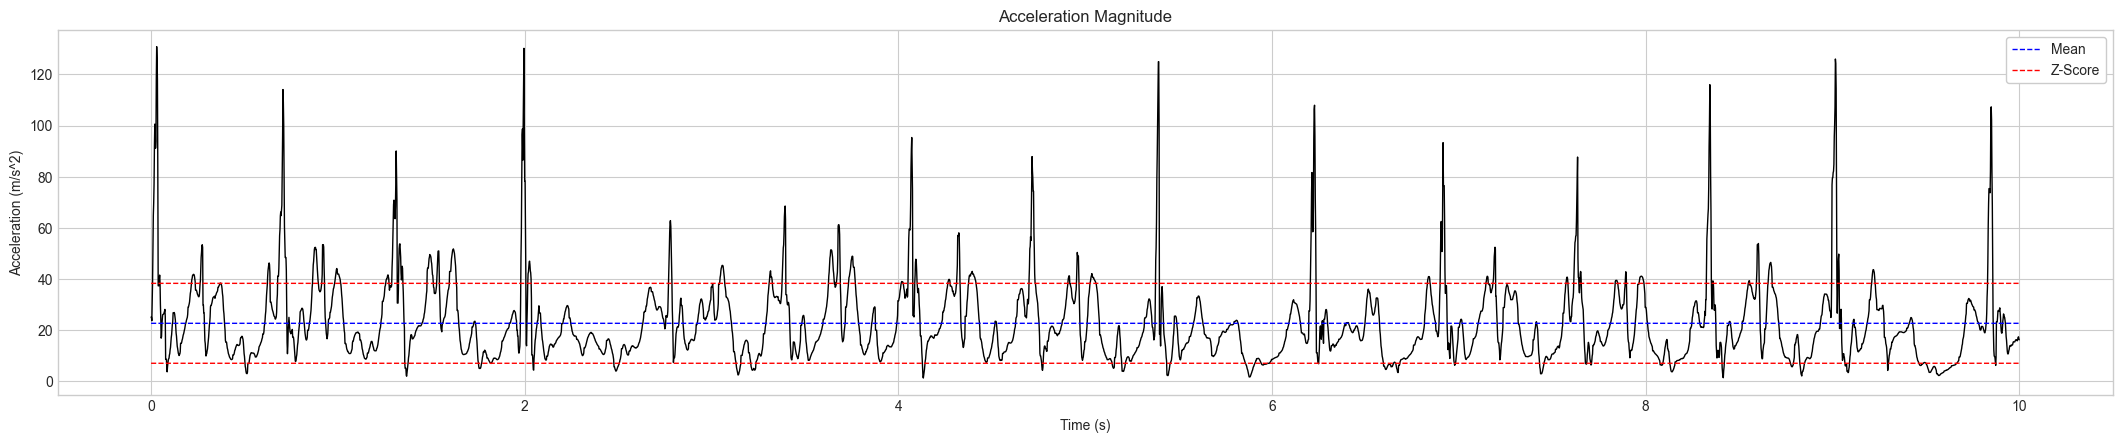

In [36]:
a_mag = np.sqrt(df_subset['Acceleration x (m/s^2)']**2 + df_subset['Acceleration y (m/s^2)']**2 + df_subset['Acceleration z (m/s^2)']**2)
t = df_subset['Time (s)']
fig, ax = plt.subplots(1, 1, figsize = (22,5))
fig.tight_layout(pad = 4.0)
ax.plot(t, a_mag, linewidth = 1, color = 'black', marker = '')
ax.plot(t, [np.mean(a_mag)]*len(a_mag), linewidth = 1, linestyle = 'dashed', color ='blue',label='Mean')
ax.plot(t, [np.mean(a_mag) - np.std(a_mag)]*len(a_mag), linewidth = 1, linestyle = 'dashed', color ='red',label='Z-Score')
ax.plot(t, [np.mean(a_mag) + np.std(a_mag)]*len(a_mag), linewidth = 1, linestyle = 'dashed', color ='red')
plt.legend(framealpha=1, frameon=True,bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Time (s)')
ax.set_ylabel('Acceleration (m/s^2)')
ax.set_title('Acceleration Magnitude')

In [37]:
#peak detection
import numpy as np
import pylab

def thresholding_algo(y, lag, threshold, influence):
    signals = np.zeros(len(y))
    filteredY = np.array(y)
    avgFilter = [0]*len(y)
    stdFilter = [0]*len(y)
    avgFilter[lag - 1] = np.mean(y[0:lag])
    stdFilter[lag - 1] = np.std(y[0:lag])
    for i in range(lag, len(y)):
        if abs(y[i] - avgFilter[i-1]) > threshold * stdFilter [i-1]:
            if y[i] > avgFilter[i-1]:
                signals[i] = 1
            else:
                signals[i] = -1

            filteredY[i] = influence * y[i] + (1 - influence) * filteredY[i-1]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])
        else:
            signals[i] = 0
            filteredY[i] = y[i]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])

    return dict(signals = np.asarray(signals),
                avgFilter = np.asarray(avgFilter),
                stdFilter = np.asarray(stdFilter))

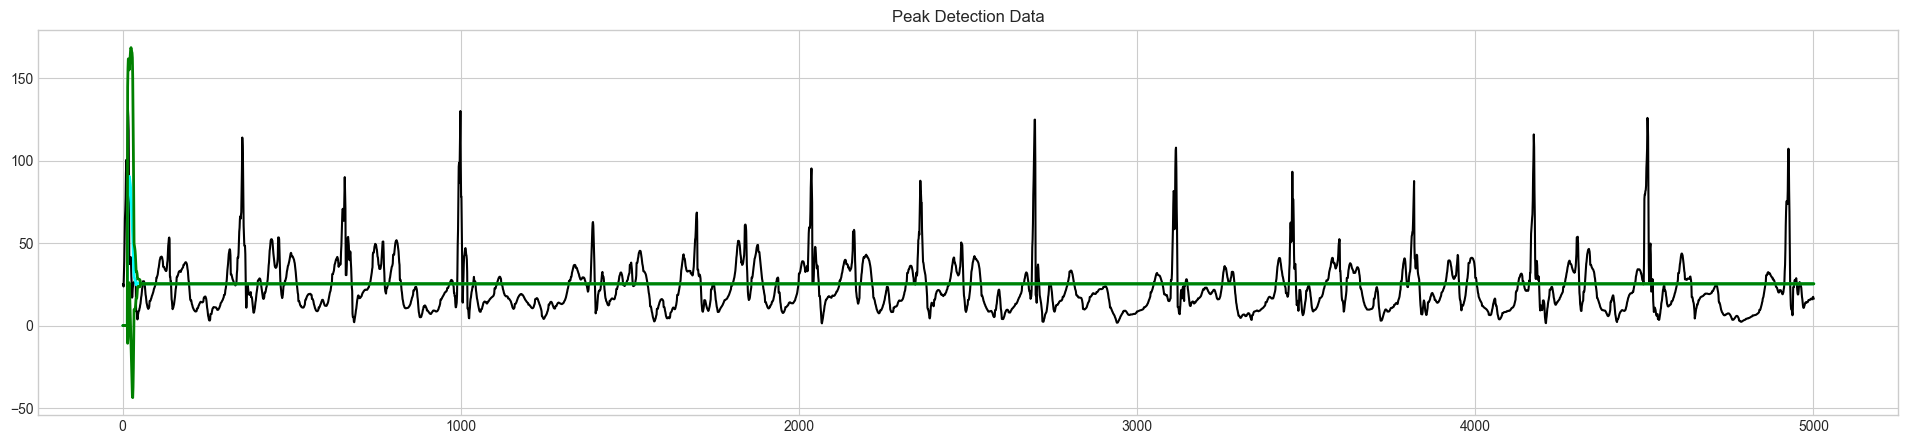

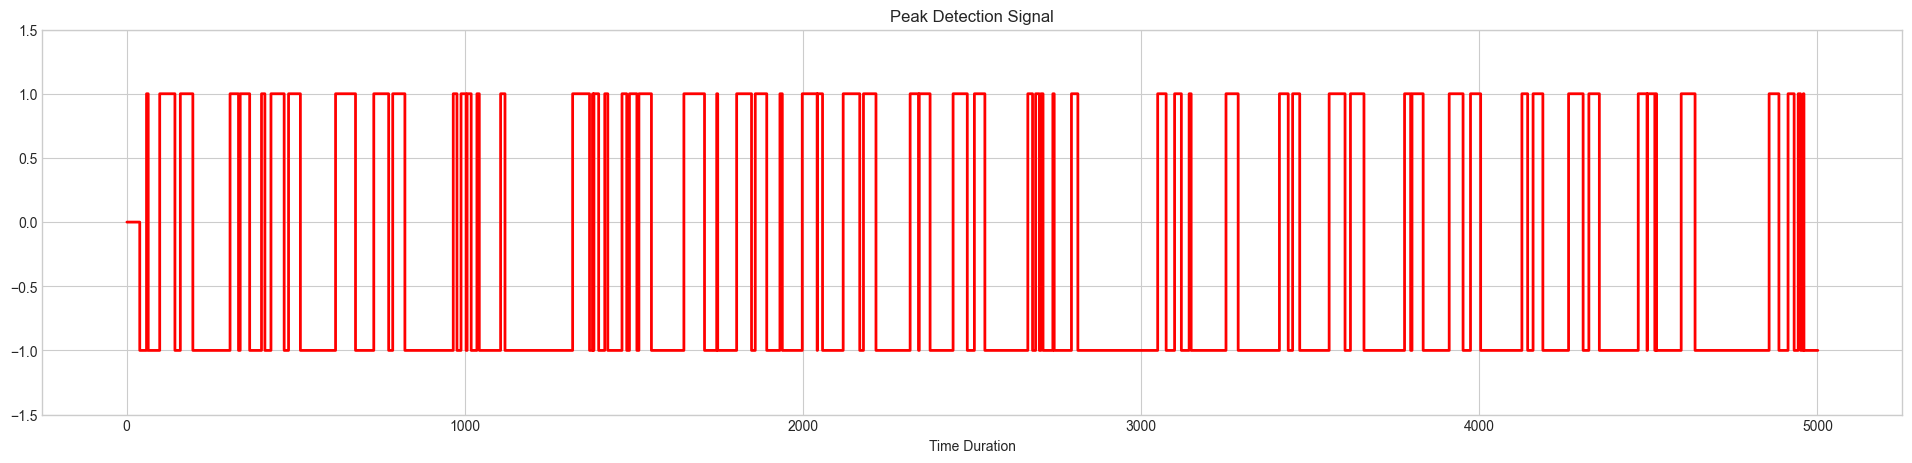

In [38]:
# Data
y = np.array(a_mag)
#y = np.array([])

# Settings: lag = 30, threshold = 5, influence = 0 #5,3.5,0
lag =15
threshold =2.5
influence = 0

# Run algo with settings from above
result = thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)

# Plot result
fig, ax = plt.subplots(1,1, figsize = (24,5))
#pylab.subplot(211)
pylab.plot(np.arange(1, len(y)+1), y,color = 'black')

pylab.plot(np.arange(1, len(y)+1),
           result["avgFilter"], color="cyan", lw=2)

pylab.plot(np.arange(1, len(y)+1),
          result["avgFilter"] + threshold * result["stdFilter"], color="green", lw=2)

pylab.plot(np.arange(1, len(y)+1),
           result["avgFilter"] - threshold * result["stdFilter"], color="green", lw=2)
ax.set_title('Peak Detection Data')

fig, ax = plt.subplots(1,1, figsize = (24,5))
#pylab.subplot(212)
pylab.step(np.arange(1, len(y)+1), result["signals"], color="red", lw=2)
#plt.xlim(200 , 300)
pylab.ylim(-1.5,1.5)
ax.set_xlabel('Time Duration')
ax.set_title('Peak Detection Signal')#(1 second)
pylab.show()

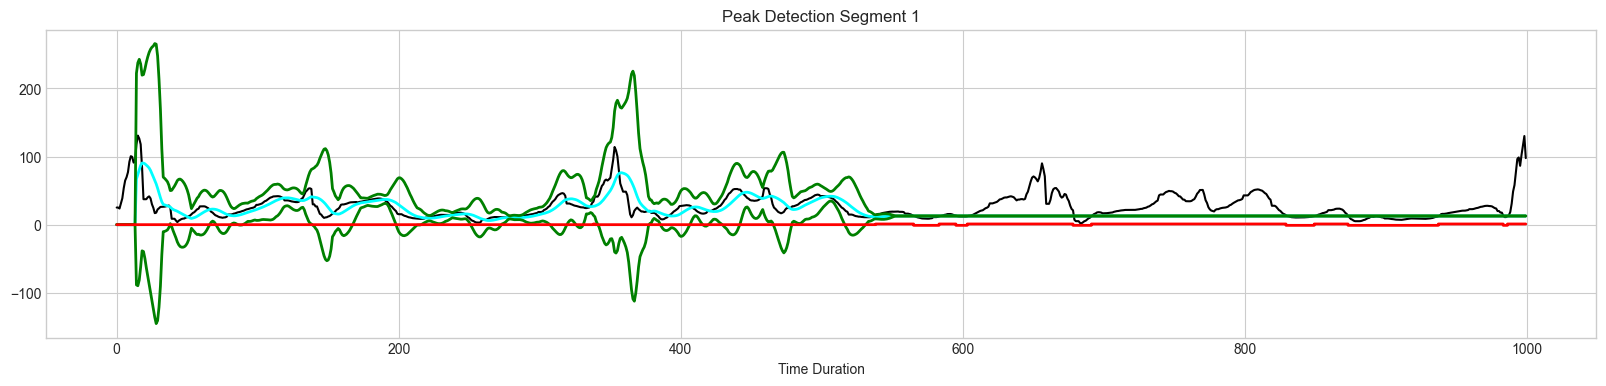

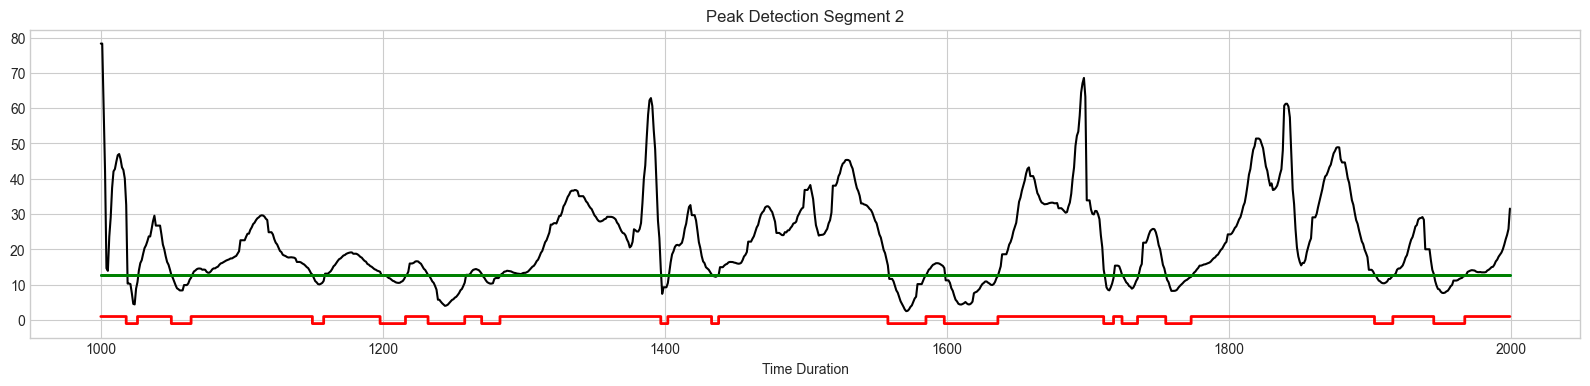

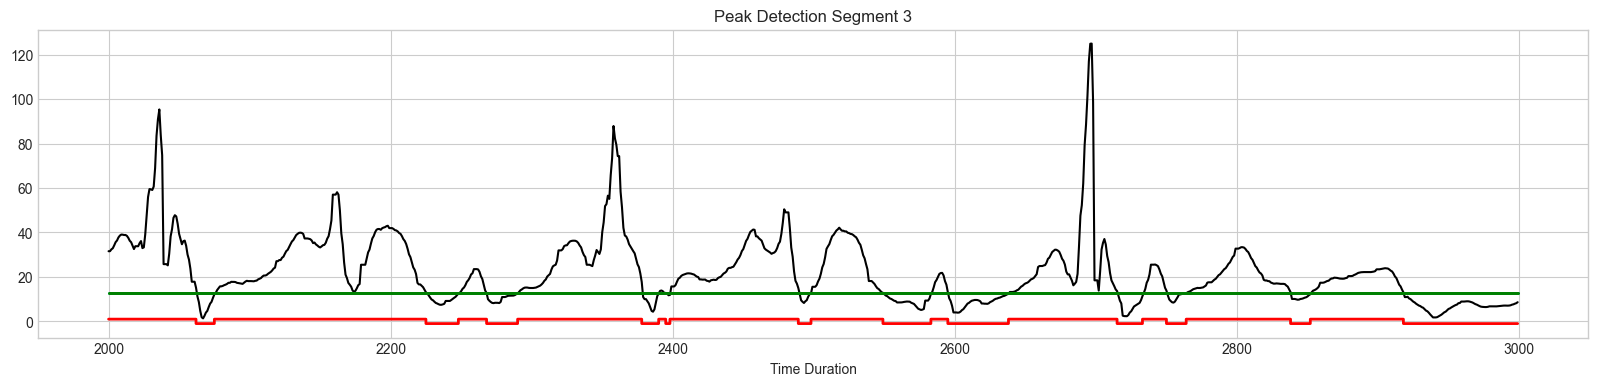

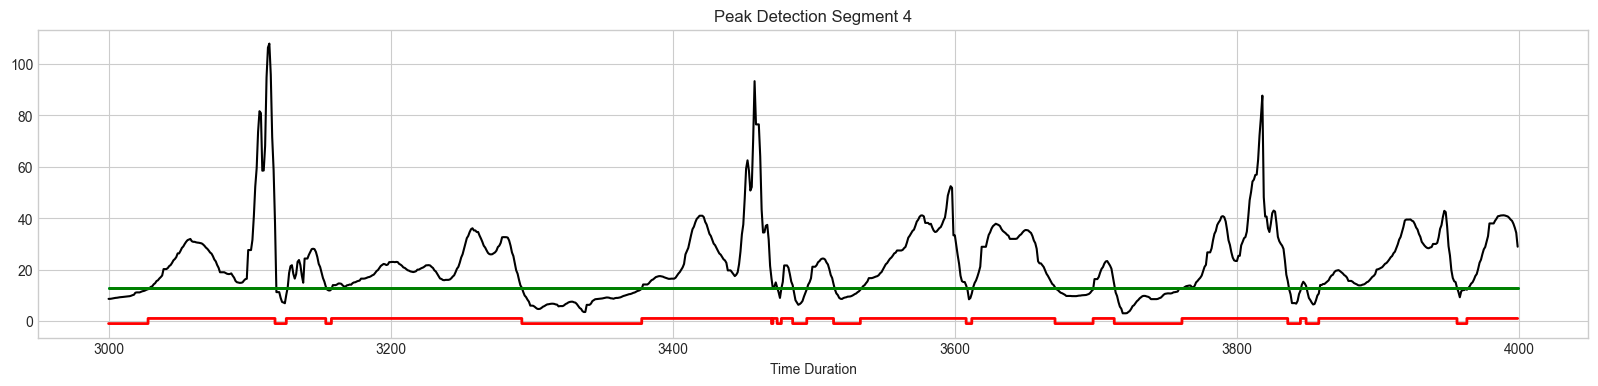

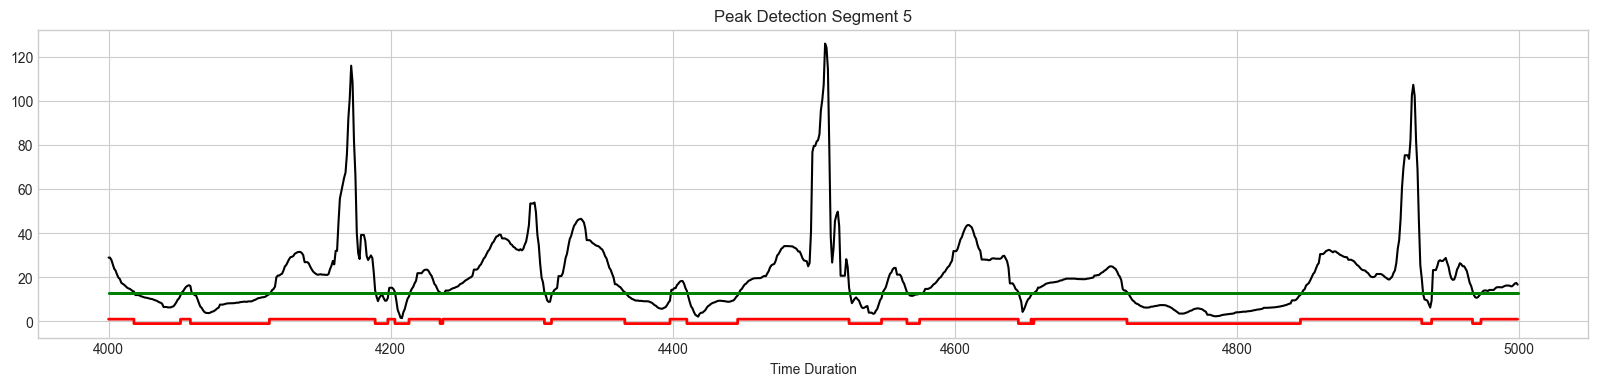

In [39]:
# Sample data (replace this with your actual data)
y = np.array(a_mag)

# Settings: lag = 15, threshold = 2.5, influence = 0
lag = 15
threshold = 5
influence = 0

# Run algo with settings from above
result = thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)

# Plot result in segments of 100 data points
segment_size = 1000
total_segments = len(y) // segment_size

for i in range(total_segments):
    start_idx = i * segment_size
    end_idx = start_idx + segment_size

    fig, ax = plt.subplots(1, 1, figsize=(20, 4))

    # Plot original data
    ax.plot(np.arange(start_idx, end_idx), y[start_idx:end_idx], color='black')

    # Plot average filter and threshold lines
    ax.plot(np.arange(start_idx, end_idx), result["avgFilter"][start_idx:end_idx], color="cyan", lw=2)
    ax.plot(np.arange(start_idx, end_idx), result["avgFilter"][start_idx:end_idx] + threshold * result["stdFilter"][start_idx:end_idx], color="green", lw=2)
    ax.plot(np.arange(start_idx, end_idx), result["avgFilter"][start_idx:end_idx] - threshold * result["stdFilter"][start_idx:end_idx], color="green", lw=2)

    # Plot peak detection signal
    ax.step(np.arange(start_idx, end_idx), result["signals"][start_idx:end_idx], color="red", lw=2)

    ax.set_xlabel('Time Duration')
    ax.set_title(f'Peak Detection Segment {i + 1}')
    plt.show()


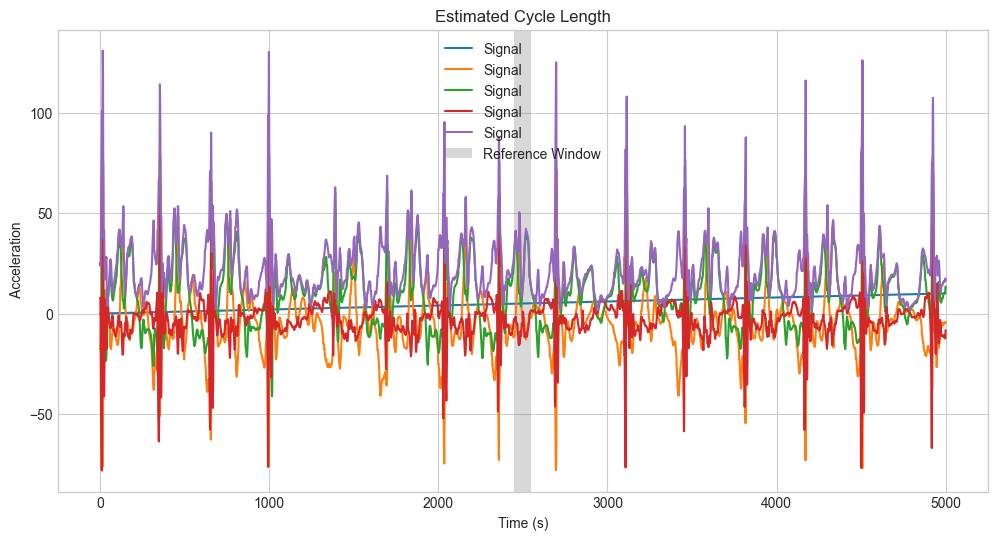

Estimated Cycle Length: 100


In [40]:
def calculate_estimated_cycle_length(walk_signal, center_point, reference_window_size=1000, normalized_cycle_length=100):
    reference_window = walk_signal.iloc[:reference_window_size]

    differences = []
    for i in range(1, len(walk_signal) - reference_window_size):
        sub_segment = walk_signal.iloc[i:i + reference_window_size]


        sub_segment = sub_segment.iloc[:normalized_cycle_length]

        euclidean_distance = np.linalg.norm(reference_window - sub_segment)
        differences.append(euclidean_distance)

    minima_indices = np.r_[True, differences[1:] < differences[:-1]] & np.r_[differences[:-1] < differences[1:], True]
    minima_indices = np.where(minima_indices)[0]

    if len(minima_indices) > 1:
        cycle_length = int(np.median(np.diff(minima_indices)))
    else:
        cycle_length = normalized_cycle_length

    return cycle_length


center_point = len(df_subset) // 2
reference_window_size = 1000
normalized_cycle_length = 100


estimated_cycle_length = calculate_estimated_cycle_length(df_subset, center_point, reference_window_size, normalized_cycle_length)

plt.figure(figsize=(12, 6))
plt.plot(df_subset.index, df_subset, label='Signal')
plt.axvspan(df_subset.index[center_point - estimated_cycle_length // 2],
            df_subset.index[center_point + estimated_cycle_length // 2 - 1],
            facecolor='gray', alpha=0.3, label='Reference Window')
plt.title('Estimated Cycle Length')
plt.xlabel('Time (s)')
plt.ylabel(' Acceleration')
plt.legend()
plt.show()

print("Estimated Cycle Length:", estimated_cycle_length)


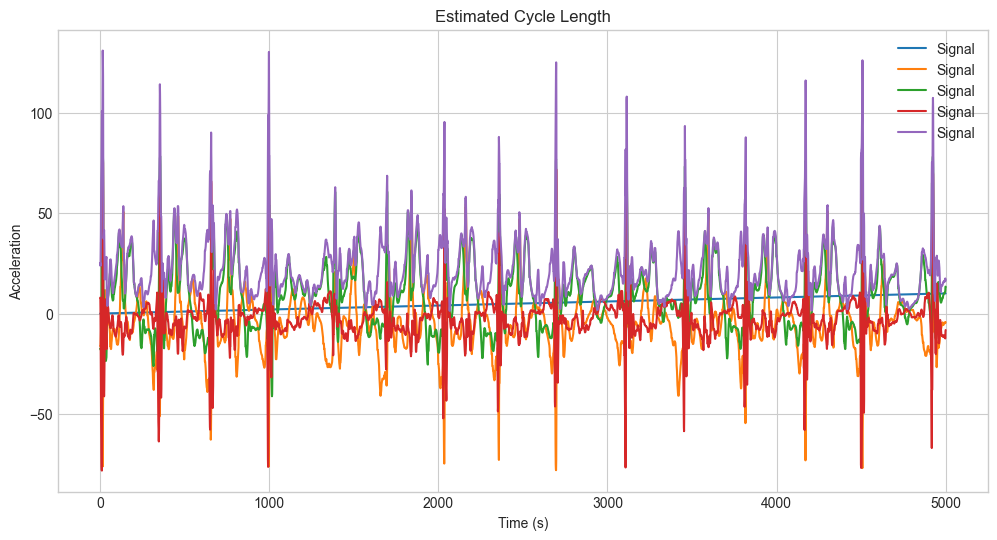

Estimated Cycle Length: 100


In [41]:
def calculate_estimated_cycle_length(walk_signal, center_point, normalized_cycle_length=100):
    differences = []

    for i in range(1, len(walk_signal) - normalized_cycle_length):
        sub_segment = walk_signal.iloc[i:i + normalized_cycle_length]
        euclidean_distance = np.linalg.norm(walk_signal - sub_segment)
        differences.append(euclidean_distance)

    minima_indices = np.r_[True, differences[1:] < differences[:-1]] & np.r_[differences[:-1] < differences[1:], True]
    minima_indices = np.where(minima_indices)[0]

    if len(minima_indices) > 1:
        cycle_length = int(np.median(np.diff(minima_indices)))
    else:
        cycle_length = normalized_cycle_length

    return cycle_length


center_point = df_subset
normalized_cycle_length = 100

estimated_cycle_length = calculate_estimated_cycle_length(df_subset, center_point, normalized_cycle_length)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df_subset.index, df_subset, label='Signal')
plt.title('Estimated Cycle Length')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.legend()
plt.show()

print("Estimated Cycle Length:", estimated_cycle_length)


In [43]:
# #aggregate 100 rows to 1 row
# import pandas as pd

# # Assuming your dataset is stored in a DataFrame called 'original_data'
# # and it has a column named 'your_column' that you want to aggregate.

# # Create a new column 'group' to represent the groups of 100 rows
# df_subset['group'] = df_subset.groupby(df_subset.index // 100).cumcount()

# # Group by the 'group' column and aggregate the data
# aggregated_data = df_subset.groupby('').agg({
#     'Acceleration y (m/s^2)': 'sum',  # You can use other aggregation functions like 'mean', 'max', etc.
#     # Add other columns and corresponding aggregation functions if needed
# }).reset_index(drop=True)

# # Drop the 'group' column if you don't need it in the final result
# aggregated_data = aggregated_data.drop(columns='group')

# # Now, 'aggregated_data' contains the aggregated information


C:\Users\ATISHAY SG\AppData\Local\Temp\ipykernel_5512\2207588080.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['group'] = df_subset.groupby(df_subset.index // 100).cumcount()


KeyError: "['group'] not found in axis"

In [44]:
import pandas as pd

# Assuming your dataset is in a DataFrame named 'df'
# Replace this with the actual name of your DataFrame

# Create a new DataFrame to store the aggregated data
aggregated_df = pd.DataFrame()

# Specify the chunk size
chunk_size = 100

# Calculate the number of chunks
num_chunks = len(df_subset) // chunk_size

# Iterate through the chunks
for i in range(num_chunks):
    # Select the rows for the current chunk
    chunk = df_subset.iloc[i * chunk_size : (i + 1) * chunk_size]

    # Calculate the mean for each feature within the chunk
    aggregated_row = chunk.mean()

    # Append the aggregated row to the new DataFrame
    aggregated_df = aggregated_df.append(aggregated_row, ignore_index=True)

# Display the aggregated DataFrame
print(aggregated_df)


    Time (s)  Acceleration x (m/s^2)  Acceleration y (m/s^2)  \
0   0.099000               -9.644578               11.045257   
1   0.299000                2.145151               24.539451   
2   0.498999                1.603469               -3.456605   
3   0.699000              -15.758932                0.921474   
4   0.899000                0.843639               24.890959   
5   1.098999                2.513478                1.295257   
6   1.298999              -17.203426               -0.238983   
7   1.498999                1.579667               22.534553   
8   1.698999               -0.359902                6.325861   
9   1.899000              -13.515047                1.794867   
10  2.098999               -6.139637                5.161007   
11  2.298999                2.398170               15.844530   
12  2.498999               -1.228133               10.085991   
13  2.698999              -13.345418               18.351781   
14  2.898999               -3.131828    

C:\Users\ATISHAY SG\AppData\Local\Temp\ipykernel_5512\3293814151.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aggregated_df = aggregated_df.append(aggregated_row, ignore_index=True)
C:\Users\ATISHAY SG\AppData\Local\Temp\ipykernel_5512\3293814151.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aggregated_df = aggregated_df.append(aggregated_row, ignore_index=True)
C:\Users\ATISHAY SG\AppData\Local\Temp\ipykernel_5512\3293814151.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aggregated_df = aggregated_df.append(aggregated_row, ignore_index=True)
C:\Users\ATISHAY SG\AppData\Local\Temp\ipykernel_5512\3293814151.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a f